In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
from geopandas import GeoSeries

In [2]:
fp = "geo_data/UK_LSOA_2011/Lower_Layer_Super_Output_Areas_December_2011_Generalised_Clipped__Boundaries_in_England_and_Wales.shp"
UK_LSOAs = gpd.read_file(fp)
#UK_LSOAs = UK_LSOAs.to_crs(epsg=3395)

In [6]:
df = pd.read_csv('processed_data/epd_202012.csv')

In [4]:
ph_chunk

,YEAR_MONTH,REGIONAL_OFFICE_NAME,REGIONAL_OFFICE_CODE,STP_NAME,STP_CODE,PCO_NAME,PCO_CODE,PRACTICE_NAME,PRACTICE_CODE,ADDRESS_1,...,BNF_CHAPTER_PLUS_CODE,QUANTITY,ITEMS,TOTAL_QUANTITY,ADQUSAGE,NIC,ACTUAL_COST,UNIDENTIFIED,LON,LAT
5470000,202012,EAST OF ENGLAND,Y61,"BEDFORDSHIRE, LUTON & MILTON KEYNES STP",QHG,MILTON KEYNES CCG,04F00,CENTRAL MILTON KEYNES MEDICAL CENTRE,K82065,C.M.K MEDICAL CENTRE,...,10: Musculoskeletal and Joint Diseases,14.0,7,98.0,65.33333,10.01,10.09565,N,-0.774998,52.042399
5470001,202012,EAST OF ENGLAND,Y61,"BEDFORDSHIRE, LUTON & MILTON KEYNES STP",QHG,MILTON KEYNES CCG,04F00,CENTRAL MILTON KEYNES MEDICAL CENTRE,K82065,C.M.K MEDICAL CENTRE,...,10: Musculoskeletal and Joint Diseases,112.0,2,224.0,149.33333,60.32,56.11969,N,-0.774998,52.042399
5470002,202012,EAST OF ENGLAND,Y61,"BEDFORDSHIRE, LUTON & MILTON KEYNES STP",QHG,MILTON KEYNES CCG,04F00,CENTRAL MILTON KEYNES MEDICAL CENTRE,K82065,C.M.K MEDICAL CENTRE,...,10: Musculoskeletal and Joint Diseases,56.0,5,280.0,186.66667,75.40,70.18061,N,-0.774998,52.042399
5470003,202012,EAST OF ENGLAND,Y61,"BEDFORDSHIRE, LUTON & MILTON KEYNES STP",QHG,MILTON KEYNES CCG,04F00,CENTRAL MILTON KEYNES MEDICAL CENTRE,K82065,C.M.K MEDICAL CENTRE,...,10: Musculoskeletal and Joint Diseases,2.0,4,8.0,0.00000,11.92,11.08506,N,-0.774998,52.042399
5470004,202012,EAST OF ENGLAND,Y61,"BEDFORDSHIRE, LUTON & MILTON KEYNES STP",QHG,MILTON KEYNES CCG,04F00,CENTRAL MILTON KEYNES MEDICAL CENTRE,K82065,C.M.K MEDICAL CENTRE,...,10: Musculoskeletal and Joint Diseases,1.0,6,6.0,0.00000,8.94,8.31380,N,-0.774998,52.042399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5479995,202012,LONDON,Y56,EAST LONDON HEALTH & CARE P/SHIP STP,QMF,WALTHAM FOREST CCG,08W00,THE ALLUM MEDICAL CENTRE,F86036,THE ALLUM MEDICAL CENTRE,...,04: Central Nervous System,224.0,2,448.0,149.33333,24.48,22.79010,N,0.002766,51.570318
5479996,202012,LONDON,Y56,EAST LONDON HEALTH & CARE P/SHIP STP,QMF,WALTHAM FOREST CCG,08W00,THE ALLUM MEDICAL CENTRE,F86036,THE ALLUM MEDICAL CENTRE,...,04: Central Nervous System,112.0,1,112.0,112.00000,66.00,61.38943,N,0.002766,51.570318
5479997,202012,LONDON,Y56,EAST LONDON HEALTH & CARE P/SHIP STP,QMF,WALTHAM FOREST CCG,08W00,THE ALLUM MEDICAL CENTRE,F86036,THE ALLUM MEDICAL CENTRE,...,04: Central Nervous System,28.0,2,56.0,56.00000,33.00,30.71332,N,0.002766,51.570318
5479998,202012,LONDON,Y56,EAST LONDON HEALTH & CARE P/SHIP STP,QMF,WALTHAM FOREST CCG,08W00,THE ALLUM MEDICAL CENTRE,F86036,THE ALLUM MEDICAL CENTRE,...,04: Central Nervous System,56.0,47,2632.0,2632.00000,98.70,92.36936,N,0.002766,51.570318


In [3]:
data_file_path = 'processed_data/epd_202012.csv'

practice_to_lonlat = {}

chunksize = 10**4
for i, ph_chunk in enumerate(pd.read_csv(data_file_path, chunksize=chunksize)):
    
    for i, row in ph_chunk.iterrows():
        practice_to_lonlat[row['PRACTICE_CODE']] = (row['LON'], row['LAT'])

KeyboardInterrupt: 

In [ ]:
practice_to_lonlat = {}

for i, row in df.iterrows():
    practice_to_lonlat[row['PRACTICE_CODE']] = (row['LON'], row['LAT'])

In [7]:
df.head()

,YEAR_MONTH,REGIONAL_OFFICE_NAME,REGIONAL_OFFICE_CODE,STP_NAME,STP_CODE,PCO_NAME,PCO_CODE,PRACTICE_NAME,PRACTICE_CODE,ADDRESS_1,...,BNF_CHAPTER_PLUS_CODE,QUANTITY,ITEMS,TOTAL_QUANTITY,ADQUSAGE,NIC,ACTUAL_COST,UNIDENTIFIED,LON,LAT
0,202012,NORTH WEST,Y62,CHESHIRE & MERSEYSIDE STP,QYG,LIVERPOOL CCG,99A00,KNOTTY ASH MEDICAL CENTRE,N82633,411/413 EAST PRESCOT ROAD,...,04: Central Nervous System,56.0,1,56.0,42.00000,3.54,3.30444,N,-2.890651,53.418555
1,202012,NORTH WEST,Y62,CHESHIRE & MERSEYSIDE STP,QYG,LIVERPOOL CCG,99A00,KNOTTY ASH MEDICAL CENTRE,N82633,411/413 EAST PRESCOT ROAD,...,04: Central Nervous System,473.0,1,473.0,31.53333,99.48,92.52433,N,-2.890651,53.418555
2,202012,NORTH WEST,Y62,CHESHIRE & MERSEYSIDE STP,QYG,LIVERPOOL CCG,99A00,LANCE LANE MEDICAL CENTRE,N82014,LANCE LANE MEDICAL CENTRE,...,04: Central Nervous System,21.0,6,126.0,15.75000,3.12,3.57586,N,-2.911695,53.395662
3,202012,NORTH WEST,Y62,CHESHIRE & MERSEYSIDE STP,QYG,LIVERPOOL CCG,99A00,LANCE LANE MEDICAL CENTRE,N82014,LANCE LANE MEDICAL CENTRE,...,04: Central Nervous System,112.0,1,112.0,28.00000,5.11,4.86447,N,-2.911695,53.395662
4,202012,NORTH WEST,Y62,CHESHIRE & MERSEYSIDE STP,QYG,LIVERPOOL CCG,99A00,LANCE LANE MEDICAL CENTRE,N82014,LANCE LANE MEDICAL CENTRE,...,04: Central Nervous System,56.0,1,56.0,14.00000,2.55,2.48379,N,-2.911695,53.395662


<AxesSubplot:>

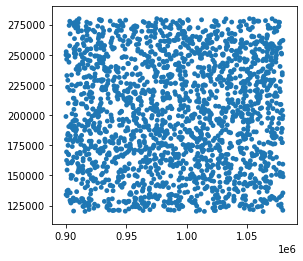

In [29]:
import numpy as np
from shapely.geometry import Point
xmin, xmax, ymin, ymax = 900000, 1080000, 120000, 280000
xc = (xmax - xmin) * np.random.random(2000) + xmin
yc = (ymax - ymin) * np.random.random(2000) + ymin
pts = GeoSeries([Point(x, y) for x, y in zip(xc, yc)])
circles = pts.buffer(2000)
#mp = circles.unary_union
gdf_circles = gpd.GeoDataFrame()
gdf_circles['geometry'] = circles
gdf_circles.plot()

In [ ]:
[Point(x, y) for x, y in zip(xc, yc)]

<AxesSubplot:>

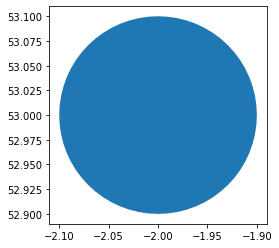

In [40]:
import numpy as np
from shapely.geometry import Point

points = [
    (-2, 53)
]

gpts = GeoSeries([Point(x, y) for x, y in points])
circles = gpts.buffer(0.1)
#mp = circles.unary_union
gdf_circles = gpd.GeoDataFrame()
gdf_circles['geometry'] = circles
gdf_circles.plot()

<AxesSubplot:>

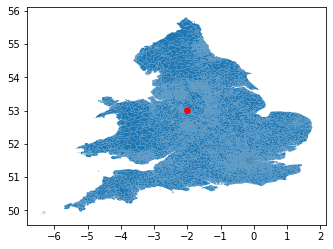

In [41]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
UK_LSOAs.plot(ax=ax, legend=True)
gdf_circles.plot(ax=ax, color="red")